In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("Group_8_data_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,0,298.1,308.6,1551,42.8,0,0,0,1,0
1,1,298.2,308.7,1408,46.3,3,0,1,0,0
2,2,298.1,308.5,1498,49.4,5,0,1,0,0
3,3,298.2,308.6,1433,39.5,7,0,1,0,0
4,4,298.2,308.7,1408,40.0,9,0,1,0,0


In [4]:
X=df[['air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear',
       'Type_H', 'Type_L', 'Type_M']]
y=df['failure']

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  stratify=y,test_size=0.2, random_state=42)

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train1,y_train1)


In [7]:
df=df.drop("Unnamed: 0",axis=1)

In [43]:
df.head(10)

,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,298.1,308.6,1551,42.8,0,0,0,1,0
1,298.2,308.7,1408,46.3,3,0,1,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0
5,298.1,308.6,1425,41.9,11,0,0,1,0
6,298.1,308.6,1558,42.4,14,0,1,0,0
7,298.1,308.6,1527,40.2,16,0,1,0,0
8,298.3,308.7,1667,28.6,18,0,0,1,0
9,298.5,309.0,1741,28.0,21,0,0,1,0


In [8]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### Using LASSO 

In [9]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [10]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5,verbose=3
                      )

In [11]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-8.457 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-8.601 total time=   0.0s
[CV 3/5] END ..................model__alpha=0.1;, score=0.138 total time=   0.0s
[CV 4/5] END ..................model__alpha=0.1;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=0.1;, score=0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-10.309 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=0.2;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=0.2;, score=0.000 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-10.309 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

[CV 5/5] END ..................model__alpha=2.1;, score=0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=2.2;, score=-10.309 total time=   0.0s
[CV 2/5] END ................model__alpha=2.2;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=2.2;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=2.2;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=2.2;, score=0.000 total time=   0.0s
[CV 1/5] END .model__alpha=2.3000000000000003;, score=-10.309 total time=   0.0s
[CV 2/5] END .model__alpha=2.3000000000000003;, score=-10.606 total time=   0.0s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.029 total time=   0.0s
[CV 4/5] END ...model__alpha=2.3000000000000003;, score=0.000 total time=   0.0s
[CV 5/5] END ...model__alpha=2.3000000000000003;, score=0.000 total time=   0.0s
[CV 1/5] END .model__alpha=2.4000000000000004;, score=-10.309 total time=   0.0s
[CV 2/5] END .model__alpha=2

[CV 2/5] END ................model__alpha=4.2;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=4.2;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=4.2;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=4.2;, score=0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=4.3;, score=-10.309 total time=   0.0s
[CV 2/5] END ................model__alpha=4.3;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=4.3;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=4.3;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=4.3;, score=0.000 total time=   0.0s
[CV 1/5] END .model__alpha=4.3999999999999995;, score=-10.309 total time=   0.0s
[CV 2/5] END .model__alpha=4.3999999999999995;, score=-10.606 total time=   0.0s
[CV 3/5] END ..model__alpha=4.3999999999999995;, score=-0.029 total time=   0.0s
[CV 4/5] END ...model__alpha

[CV 3/5] END .................model__alpha=6.7;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=6.7;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=6.7;, score=0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=6.8;, score=-10.309 total time=   0.0s
[CV 2/5] END ................model__alpha=6.8;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=6.8;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=6.8;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=6.8;, score=0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=6.9;, score=-10.309 total time=   0.0s
[CV 2/5] END ................model__alpha=6.9;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=6.9;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=6.9;, score=0.000 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END .................model__alpha=9.2;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=9.2;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=9.2;, score=0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=9.3;, score=-10.309 total time=   0.0s
[CV 2/5] END ................model__alpha=9.3;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=9.3;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=9.3;, score=0.000 total time=   0.0s
[CV 5/5] END ..................model__alpha=9.3;, score=0.000 total time=   0.0s
[CV 1/5] END ................model__alpha=9.4;, score=-10.309 total time=   0.0s
[CV 2/5] END ................model__alpha=9.4;, score=-10.606 total time=   0.0s
[CV 3/5] END .................model__alpha=9.4;, score=-0.029 total time=   0.0s
[CV 4/5] END ..................model__alpha=9.4;, score=0.000 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             verbose=3)

In [12]:
search.best_params_

{'model__alpha': 0.1}

In [13]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [14]:
importance = np.abs(coefficients)
importance

array([0.05083778, 0.        , 0.        , 0.0860414 , 0.        ,
       0.        , 0.        , 0.01892239])

In [15]:
features=df.columns
features_lasso=np.array(features[:-1])[importance > 0]
features_lasso

array(['air_temp', 'torque', 'Type_M'], dtype=object)

In [16]:
np.array(features[:-1])[importance == 0]

array(['process_temp', 'rot_speed', 'tool_wear', 'Type_H', 'Type_L'],
      dtype=object)

##### Best features selected from lasso using it on Random Forest and SVM Models

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 36, 
                               max_features = "sqrt", 
                               max_depth = 20,
                               oob_score = True)


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model.fit(X_train[features_lasso], y_train)
forest_y_pred = model.predict(X_valid[features_lasso])
print(f"Random Forest Classification Report on validation data using best model")
cm=confusion_matrix(y_valid, forest_y_pred)
print(cm)
print(classification_report(y_valid, forest_y_pred), "\n")

Random Forest Classification Report on validation data using best model
[[1777  155]
 [  31   37]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1932
           1       0.19      0.54      0.28        68

    accuracy                           0.91      2000
   macro avg       0.59      0.73      0.62      2000
weighted avg       0.96      0.91      0.93      2000
 



In [19]:
X_train2=X_train[features_lasso]
X_valid2=X_valid[features_lasso]
X_test2=X_test[features_lasso]
scaler = StandardScaler().fit(X_train2)
X_train_scaled1 = scaler.transform(X_train2)

X_valid_scaled1= scaler.transform(X_valid2)
X_test_scaled1 = scaler.transform(X_test2)

In [20]:
from sklearn.svm import SVC
model1=SVC(kernel='poly', gamma= 0.1, degree= 2, C=5.0)
model1.fit(X_train_scaled1, y_train)

SVC(C=5.0, degree=2, gamma=0.1, kernel='poly')

In [21]:
y_pred_train= model1.predict(X_train_scaled1)
accuracy_score(y_train, y_pred_train)

0.7961876832844574

In [22]:
y_pred_valid= model1.predict(X_valid_scaled1)
accuracy_score(y_valid, y_pred_valid)

0.765

In [23]:
print(f"Support Vector Classification Report on validation data using best model")
cm=confusion_matrix(y_valid, y_pred_valid)
print(cm)
print(classification_report(y_valid, y_pred_valid), "\n")

Support Vector Classification Report on validation data using best model
[[1481  451]
 [  19   49]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.86      1932
           1       0.10      0.72      0.17        68

    accuracy                           0.77      2000
   macro avg       0.54      0.74      0.52      2000
weighted avg       0.96      0.77      0.84      2000
 



In [24]:
######## If the relationship between the features and the target variable is not linear, using a linear model might not be a good idea
######## L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

#### Correlation

In [25]:
model = LogisticRegression(solver='liblinear',penalty='l1').fit(X_train, y_train)

pd.DataFrame({'feature names':model.feature_names_in_, 'coef': list(model.coef_[0])})

C:\Users\Student\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,feature names,coef
0,air_temp,0.110009
1,process_temp,-0.056505
2,rot_speed,0.009841
3,torque,0.256807
4,tool_wear,0.009785
5,Type_H,-11.924620
6,Type_L,-10.063971
7,Type_M,-11.027200


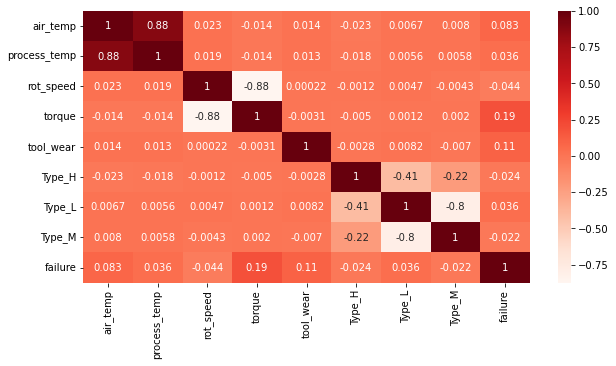

In [26]:
plt.figure(figsize=(10,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
# cor_target = abs(cor["failure"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]#consider 0.5 and above
# relevant_features

In [28]:
# cor_target

#### Using Lasso CV

In [29]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.016483
Best score using built-in LassoCV: 0.116588


In [30]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

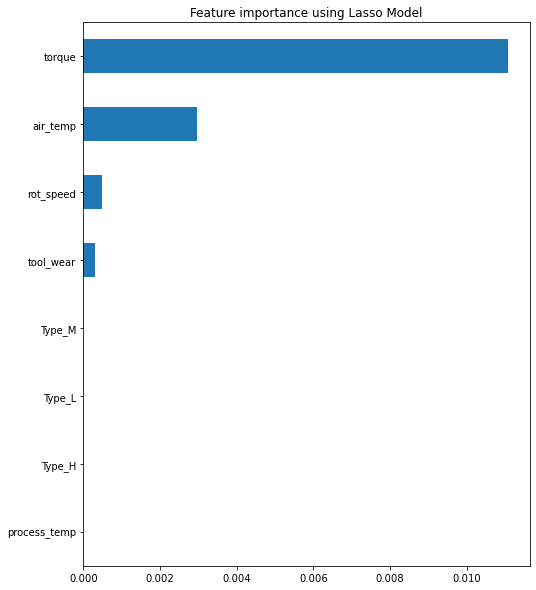

In [31]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#### Using Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 36, 
                               max_features = "sqrt", 
                               max_depth = 20,
                               oob_score = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=36, oob_score=True)

In [33]:
importances = model.feature_importances_
importances
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

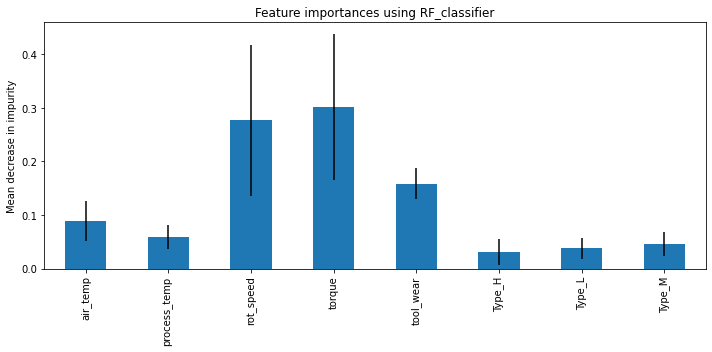

In [41]:
import pandas as pd
feature_names=X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using RF_classifier")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [35]:
k=forest_importances.sort_values(ascending
                              = False)[:6]
k

torque          0.301390
rot_speed       0.277362
tool_wear       0.158263
air_temp        0.089608
process_temp    0.058878
Type_M          0.046192
dtype: float64

In [36]:
m=k.to_dict()

In [37]:
l=[]
for key, value in m.items():
    print(key)
    l.append(key)

torque
rot_speed
tool_wear
air_temp
process_temp
Type_M


In [38]:
X_train3=X_train[l]
X_valid3=X_valid[l]
X_test3=X_test[l]
scaler = StandardScaler().fit(X_train3)
X_train_scaled2 = scaler.transform(X_train3)

X_valid_scaled2= scaler.transform(X_valid3)
X_test_scaled2 = scaler.transform(X_test3)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model.fit(X_train3, y_train)
forest_y_pred = model.predict(X_valid3)
print(f"Random Forest Classification Report on Test data using best model")
cm=confusion_matrix(y_valid, forest_y_pred)
print(cm)
print(classification_report(y_valid, forest_y_pred), "\n")

Random Forest Classification Report on Test data using best model
[[1862   70]
 [  18   50]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1932
           1       0.42      0.74      0.53        68

    accuracy                           0.96      2000
   macro avg       0.70      0.85      0.75      2000
weighted avg       0.97      0.96      0.96      2000
 



In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model1.fit(X_train_scaled2, y_train)
y_pred_test = model1.predict(X_valid_scaled2)
print(f"Support Vector Classification Report on Test data using best model")
cm=confusion_matrix(y_valid, y_pred_test)
print(cm)
print(classification_report(y_valid, y_pred_test), "\n")

Support Vector Classification Report on Test data using best model
[[1583  349]
 [  13   55]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1932
           1       0.14      0.81      0.23        68

    accuracy                           0.82      2000
   macro avg       0.56      0.81      0.57      2000
weighted avg       0.96      0.82      0.87      2000
 

